## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

In [ ]:
import pandas as pd
df = pd.read_csv('Sales Forecasting.csv')

In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED = 42

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [5]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

### EDA

In [7]:
X_train_c = X_train.copy()

In [8]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [9]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [11]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [12]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Item_Weight'>

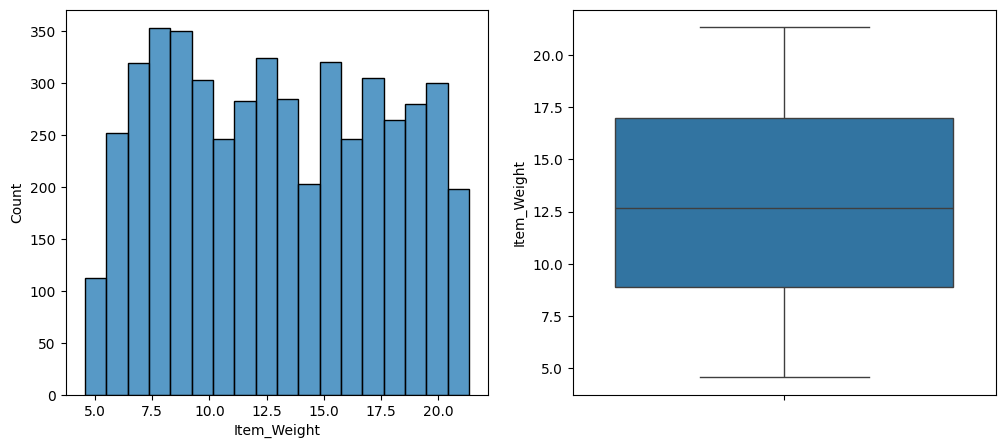

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data = X_train_c,x='Item_Weight',ax=ax[0])
sns.boxplot(data=X_train_c, y='Item_Weight', ax=ax[1])

In [15]:
def visualize_numeric_feature(data_frame, col_name):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.histplot(data=data_frame, x=col_name, ax=ax[0])
    sns.boxplot(data=data_frame,y=col_name,ax=ax[1])

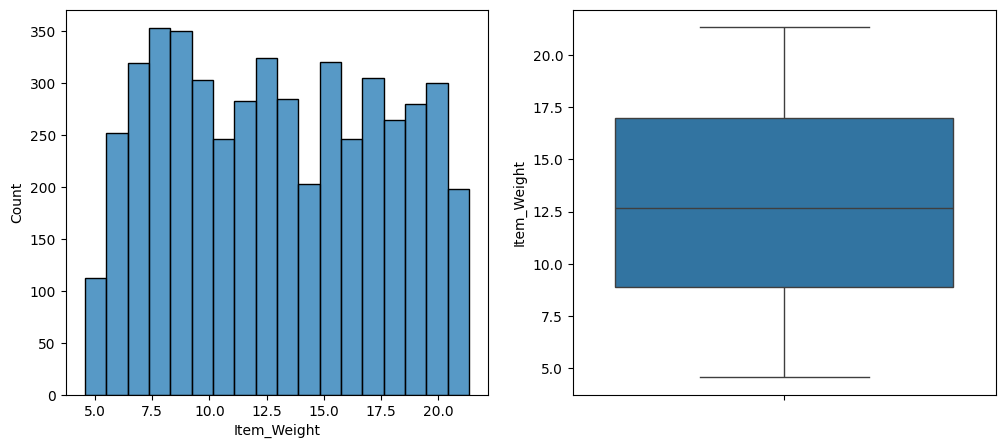

In [16]:
visualize_numeric_feature(X_train_c,'Item_Weight')

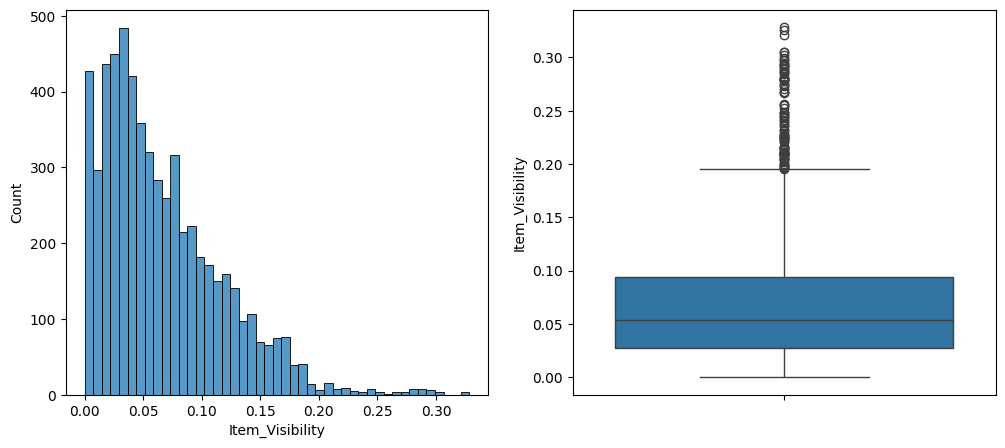

In [17]:
visualize_numeric_feature(X_train_c,'Item_Visibility')

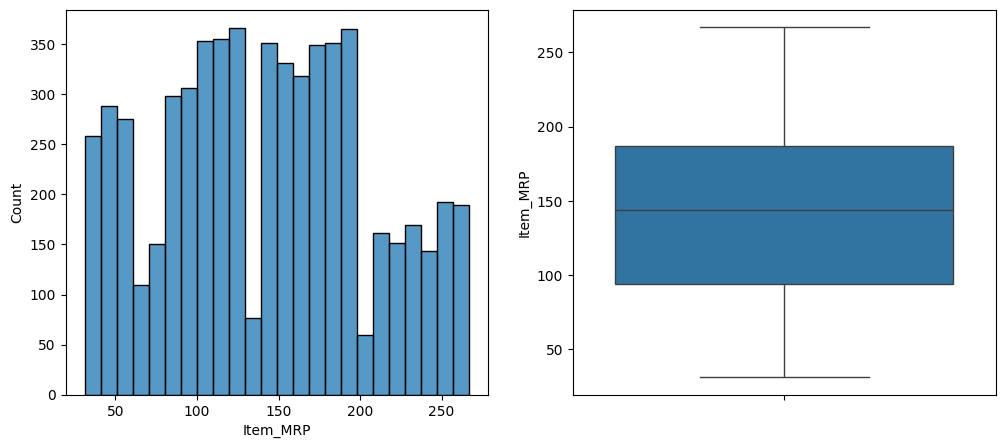

In [18]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

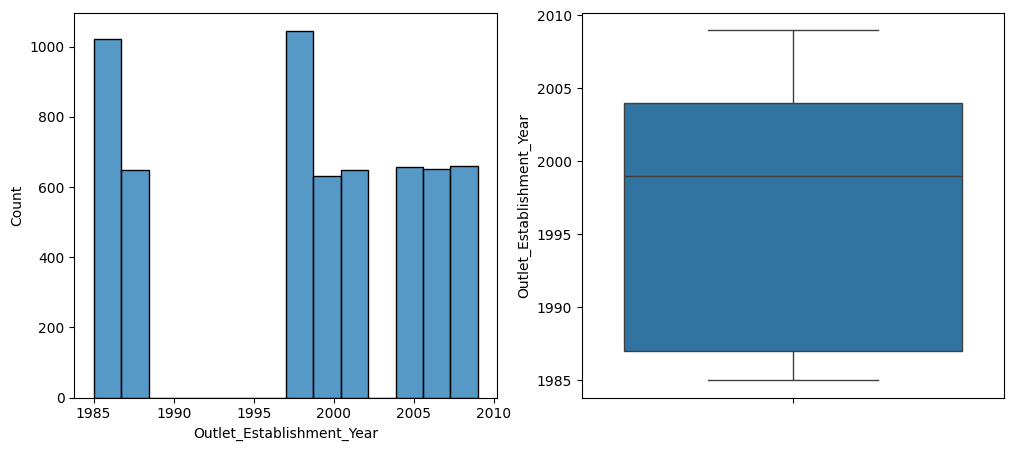

In [19]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

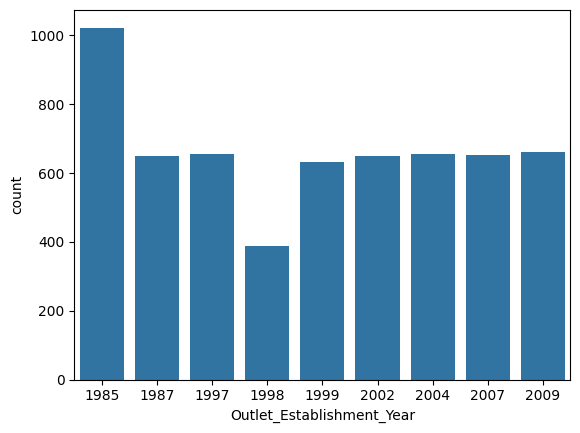

In [20]:
sns.countplot(data=X_train_c,x='Outlet_Establishment_Year')

In [21]:
cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [22]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [23]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [24]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [25]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [26]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [27]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [28]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [29]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [30]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

### Data Wrangling + Feature Engineering

In [31]:
# Step 1: Create High Level Item Types
X_train_c['Item_Identifier'].apply(lambda x: x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [32]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [33]:
X_train_c['Item_Identifier']

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
        ...  
5734    FDY08
5191    FDC41
5390    NCQ53
860     FDL46
7270    NCN30
Name: Item_Identifier, Length: 5966, dtype: object

In [34]:
X_train_c['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [35]:
# Step 1: Map Item IDs to Item Type
def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame[ 'Item_Type'].map({
        'FD':'Food',
        'NC': 'Non_Consumables',
        'DR': 'Drink'
    })
    return data_frame

In [36]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [37]:
# Step 2: Fill in missing values for Item_weight
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [38]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [39]:
X_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [40]:
# Step 2: Fill in missing values for Item_weight

# Logic:
#    1st: Use mapping of Item ID - Weight and fill in missing values
#    2nd: If completely new Item
#          Ex: Item ID is not in test/ Live data use Item Type - median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight',index="Item_Identifier").reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [41]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.6), ('Food', 19.35), ('Non_Consumables', 8.27)])

In [42]:
def impute_item_weight(data_frame):
    #1st logic item id  weight
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    #2nd logic item type - weight if any still missing
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

    return data_frame

In [43]:
X_train_c = impute_item_weight(X_train_c)

In [44]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [45]:
# Step 3: Fill in missing value for Outlet_Size

X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [46]:
print(X_train_c['Outlet_Size'].dtype)

object


In [47]:
print(X_train_c['Outlet_Size'].unique())

[nan 'Small' 'Medium' 'High']


In [48]:
X_train_c['Outlet_Size'] = X_train_c['Outlet_Size'].fillna('Unknown')

In [49]:
from scipy.stats import mode

X_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=(lambda x: x.mode()[0])  # Use pandas' mode
).reset_index()


,Outlet_Type,Outlet_Size
0,Grocery Store,Unknown
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [50]:
# Step 3: Impute missing values for Outlet_Size
# Logic: Use mapping of Outlet_Type - mode(Outlet_Size) to fill in missing values

OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=(lambda x: x.mode()[0])  # Use pandas' mode method
).reset_index()

# Create a mapping of Outlet_Type to the mode of Outlet_Size
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))

# Display the mapping
print(OUTLET_TYPE_SIZE_MAPPING)


{'Grocery Store': 'Unknown', 'Supermarket Type1': 'Small', 'Supermarket Type2': 'Medium', 'Supermarket Type3': 'Medium'}


In [51]:
def impute_outlet_size(data_frame):
    #1st logic Outlet_type - mode(Outlet_Size)\
    data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    return data_frame

In [52]:
X_train_c = impute_outlet_size(X_train_c)

In [53]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [54]:
# Step 4: Standardize Item_Fat_Content Categories
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [55]:
# Make Item Fat content categories consistent

def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({
        'Low Fat': 'Low_Fat',
        'LF' : 'Low_Fat',
        'reg': 'Regular',
        'low fat': 'Low_Fat'
    })
    return data_frame

In [56]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

In [57]:
# Step 5: Correct Item fat content for non-consumables
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [58]:
X_train_c.loc[X_train_c['Item_Type']=='Non_Consumables','Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [59]:
# Step 5: Correct Item fat content for non-consumables
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables','Item_Fat_Content'] = 'Non_Edible'
    return data_frame

In [60]:
X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [61]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [62]:
# Prepare Datasets for ML
def prepare_dataset(data_frame):
    # Step 1: Create Item Type
    data_frame = create_item_type(data_frame)
    # Step 2: Fill in missing values for Item Weight
    data_frame = impute_item_weight(data_frame)
    # Step 3: Impute missing values for Outlet_Size
    # data_frame = impute_outlet_size(data_frame)
    # Step 4: Make Item Fat Content Categories consistent
    data_frame = standardize_item_fat_content(data_frame)
    # Step 5: Correct Item Fat Content for non-consumables
    data_frame = correct_item_fat_content(data_frame)

    return data_frame

In [63]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [64]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [65]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [66]:
# Handling Categorical Data
# Expt 1: All Categorical Columns - One Hot Encoded
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [67]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [68]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [69]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [70]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [71]:
X_train_final = pd.concat([num_feats_train,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [72]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [73]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_train,X_train_cat_ohe],axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

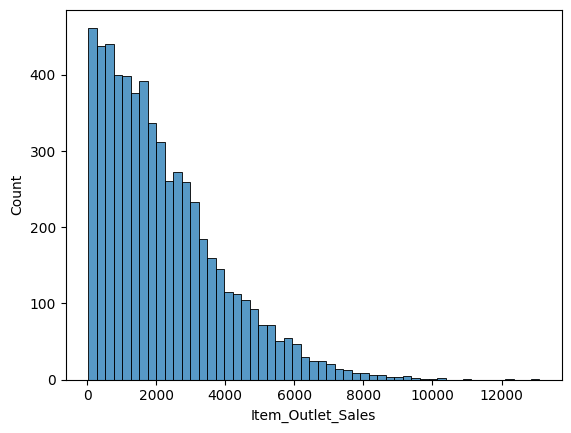

In [74]:
sns.histplot(y_train)

In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_validate
import numpy as np

In [76]:
def train_and_eval_model(model,X_train,y_train,cv=5):
    cv_results = cross_validate(model,X_train,y_train,cv=cv,scoring=('r2','neg_root_mean_squared_error'),)
    print('Model:',model)
    r2_scores = cv_results['test_r2']
    print('R2 CV scores:',r2_scores)
    print('R2 CV scores mean/stdev:',np.mean(r2_scores),'/',np.std(r2_scores))

    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse_scores]
    print('RMSE CV scores:',rmse_scores)
    print('RMSE CV scores mean/stdev:', np.mean(rmse_scores),'/',np.std(rmse_scores))

In [77]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.5709495  0.53052567 0.54823419 0.55580373 0.51941353]
R2 CV scores mean/stdev: 0.5449853237157584 / 0.018246807429525252
RMSE CV scores: [1103.6270968545946, 1163.8819878924385, 1173.5813369447874, 1152.3783117106768, 1203.0399822122345]
RMSE CV scores mean/stdev: 1159.3017431229462 / 32.51313316222676


In [78]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60637237 0.59211905 0.57498609 0.60630407 0.54999296]
R2 CV scores mean/stdev: 0.5859549075011912 / 0.021366022132190455
RMSE CV scores: [1057.0874994537057, 1084.8500967309765, 1138.3035419722166, 1084.8959456024172, 1164.136601002684]
RMSE CV scores mean/stdev: 1105.8547369524001 / 39.26425836133284


In [79]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train = X_train_final, y_train = y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58628887 0.54719795 0.54774826 0.58359451 0.54037858]
R2 CV scores mean/stdev: 0.561041633908218 / 0.019704711361348853
RMSE CV scores: [1083.7191567128395, 1143.0289016769093, 1174.2123383034307, 1115.7473084627109, 1176.5067409296723]
RMSE CV scores mean/stdev: 1138.6428892171125 / 35.38055423645777


In [80]:
xgr = xgb.XGBRegressor(objective = 'reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train = X_train_final, y_train = y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.57895204 0.55785277 0.55248314 0.58919329 0.52199813]
R2 CV scores mean/stdev: 0.5600958762595432 / 0.023309387020435536
RMSE CV scores: [1093.286365588235, 1129.5006205916684, 1168.0494084556117, 1108.2210324646385, 1199.800629789

In [81]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train = X_train_final, y_train = y_train)

Model: LGBMRegressor(random_state=42)
R2 CV scores: [0.58088351 0.54441549 0.5505328  0.57571357 0.53006047]
R2 CV scores mean/stdev: 0.5563211665972245 / 0.01920546119767948
RMSE CV scores: [1090.7758726320274, 1146.535478690946, 1170.5919125700027, 1126.2561964597644, 1189.6392333606916]
RMSE CV scores mean/stdev: 1144.7597387426865 / 34.47103819569563


In [82]:
# Handling Categorical Data
#  Expt 2: All Categorical columns - Native Handling
X_train_copy = X_train.copy().drop(columns='Item_Identifier')
cat_cols = X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = cal_cols= X_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [83]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols + num_cols]
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                4276 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [84]:
categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

In [85]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False]*n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough"
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=SEED,categorical_features=categorical_mask
    ),
)
train_and_eval_model(model=hgb,X_train=X_train_copy,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C6AAF742C0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                     

In [86]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_copy,y_train=y_train)

Model: LGBMRegressor(random_state=42)
R2 CV scores: [0.57960773 0.53997149 0.54723075 0.58201383 0.5352306 ]
R2 CV scores mean/stdev: 0.5568108801260069 / 0.019979678397865772
RMSE CV scores: [1092.4347560135063, 1152.1138450178532, 1174.8839705050716, 1117.8629906106994, 1183.0771121017228]
RMSE CV scores mean/stdev: 1144.0745348497705 / 34.318405194083084


In [87]:
# Handling Categorical Data

#   Expt 3: No Item Identifier - One Hot Encoded

cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [88]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe],axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_Consumables,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [89]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60390361 0.58736482 0.57531025 0.62019006 0.56331007]
R2 CV scores mean/stdev: 0.5900157622767229 / 0.020198186438290265
RMSE CV scores: [1060.3972477549144, 1091.1542447690335, 1137.8693593637104, 1065.5916012921844, 1146.7820246068889]
RMSE CV scores mean/stdev: 1100.3588955573464 / 35.92371207840246


In [90]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58628887 0.54719795 0.54774826 0.58359451 0.54037858]
R2 CV scores mean/stdev: 0.561041633908218 / 0.019704711361348853
RMSE CV scores: [1083.7191567128395, 1143.0289016769093, 1174.2123383034307, 1115.7473084627109, 1176.5067409296723]
RMSE CV scores mean/stdev: 1138.6428892171125 / 35.38055423645777


In [91]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.49070682 0.49854061 0.47226007 0.50823137 0.46593436]
R2 CV scores mean/stdev: 0.48713464538167595 / 0.015865897200992317
RMSE CV scores: [1202.4086065409617, 1202.8761265841738, 1268.4299671599779, 1212.517557723967, 1268.21127215

In [92]:
lgbr = LGBMRegressor(raandom_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Unknown parameter: raandom_state
[LightGBM] [Warning] Unknown parameter: raandom_state
[LightGBM] [Warning] Unknown parameter: raandom_state
[LightGBM] [Warning] Unknown parameter: raandom_state
[LightGBM] [Warning] Unknown parameter: raandom_state
Model: LGBMRegressor(raandom_state=42)
R2 CV scores: [0.58088351 0.54441549 0.5505328  0.57571357 0.53006047]
R2 CV scores mean/stdev: 0.5563211665972245 / 0.01920546119767948
RMSE CV scores: [1090.7758726320274, 1146.535478690946, 1170.5919125700027, 1126.2561964597644, 1189.6392333606916]
RMSE CV scores mean/stdev: 1144.7597387426865 / 34.47103819569563


In [93]:
# Handling Categorical Data

#    Expt 4: Item Identifier - Feature hashed, rest categorical - one hot encoded

X_train['Item_Identifier'].head()

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
Name: Item_Identifier, dtype: object

In [95]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')

# Convert the column into an iterable of iterables
input_data = X_train['Item_Identifier'].apply(lambda x: [x]).tolist()

# Transform the data
hashed_df = pd.DataFrame(
    fh.transform(input_data).toarray(),
    columns=['H' + str(i) for i in range(hash_vector_size)]
)

hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [97]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train,hashed_df,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [99]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train = X_train_final, y_train = y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60616923 0.58436228 0.56899084 0.61658613 0.55584973]
R2 CV scores mean/stdev: 0.5863916416029317 / 0.022550274852104847
RMSE CV scores: [1057.3602294550237, 1095.1169432808658, 1146.3038926874715, 1070.6352399424452, 1156.5362571867277]
RMSE CV scores mean/stdev: 1105.1905125105066 / 39.77430115634045


In [100]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED )
train_and_eval_model(model=xgr, X_train = X_train_final, y_train = y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.55178703 0.50334918 0.47251353 0.53567703 0.45261826]
R2 CV scores mean/stdev: 0.5031890071408203 / 0.03719045585803864
RMSE CV scores: [1128.003270256735, 1197.094950913745, 1268.1253302008413, 1178.1964432702891, 1283.92436526498

In [101]:
X_test.shape

(2557, 11)

In [103]:
# Preprocess Item_Identifier for hashing
input_data_test = X_test['Item_Identifier'].apply(lambda x: [x]).tolist()

# Apply FeatureHasher
hashed_test_df = pd.DataFrame(
    fh.transform(input_data_test).toarray(),
    columns=['H' + str(i) for i in range(hash_vector_size)]
)

# Process numerical and categorical features
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])

# Apply OneHotEncoder to categorical features
X_test_cat_ohe = pd.DataFrame(
    ohe.transform(cat_feats_test).toarray(),
    columns=ohe_feature_names
)

# Concatenate all feature components
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis=1)

# Display the head of the final DataFrame
X_test_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [104]:
X_test_final.shape

(2557, 81)

In [105]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
xgr.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [106]:
y_pred = xgr.predict(X_test_final)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
print('R2 Score:',r2_score, mean_squared_error)
print('RMSE Score:',mean_squared_error(y_test,y_pred,squared=False))

R2 Score: <function r2_score at 0x000001C6A7951300> <function mean_squared_error at 0x000001C6A7950AE0>
RMSE Score: 1130.085955689042


C:\Users\viraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


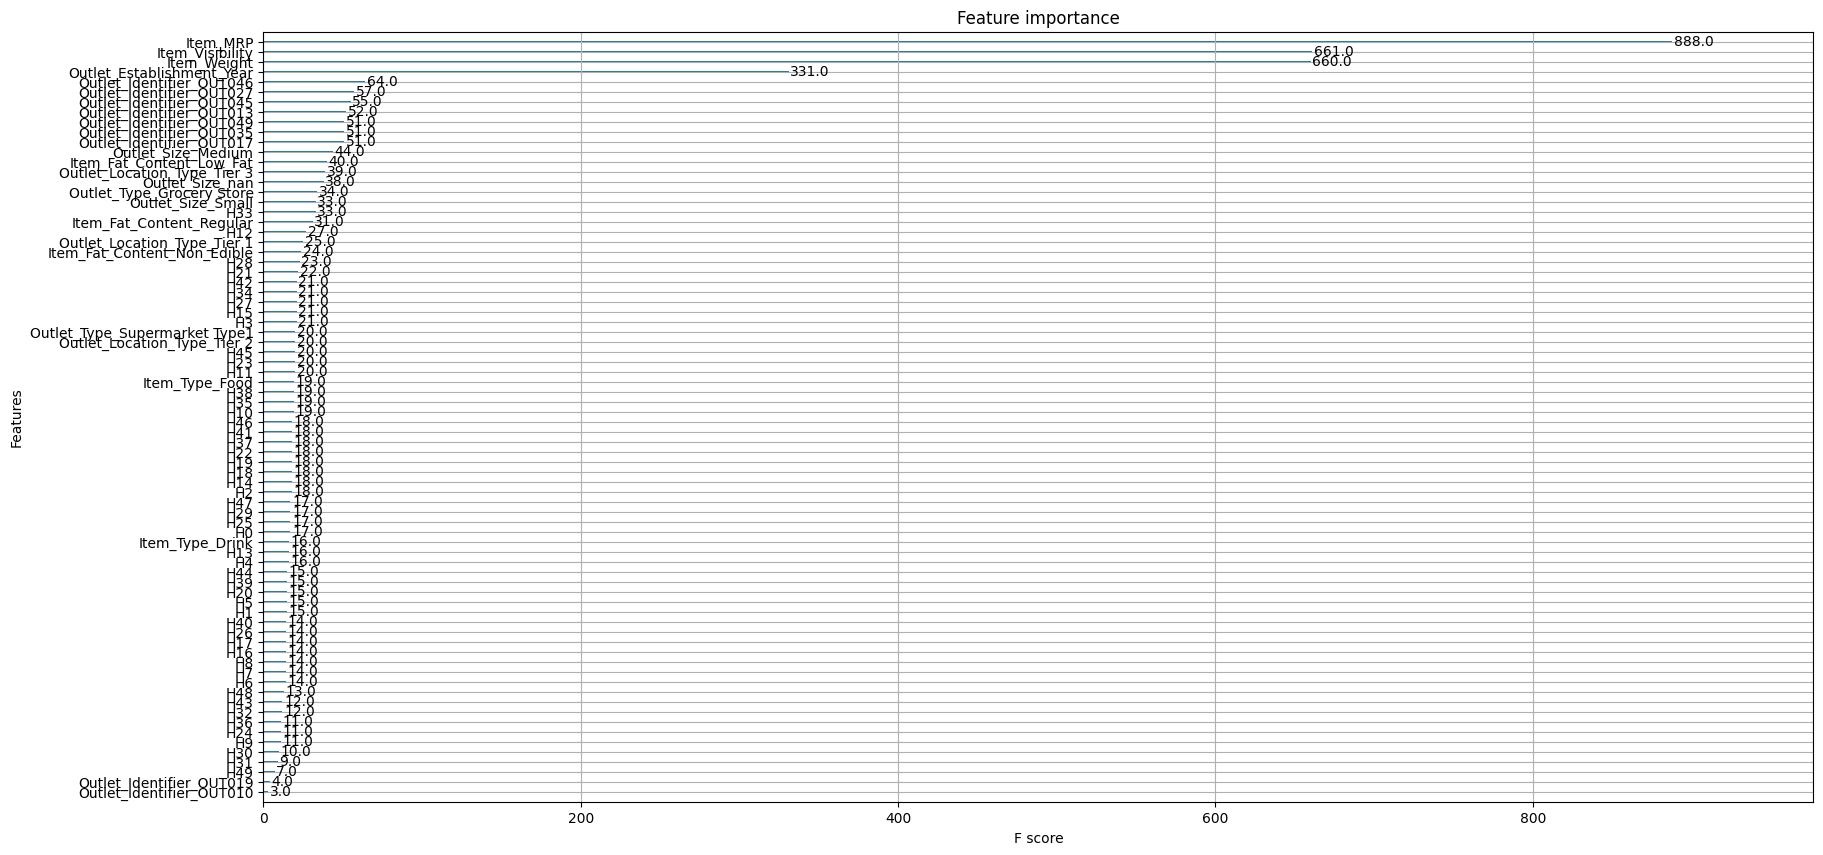

In [109]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(20,10))
plot_importance(xgr,ax=ax);

In [110]:
# Feature Hashing
# Weight Of Evidence
# Target Mean Encoding
# Embeddings
# if categorical features is ordinal e.g size [small,med, large] => label encoding